In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [6]:
data=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data.shape


(768, 9)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


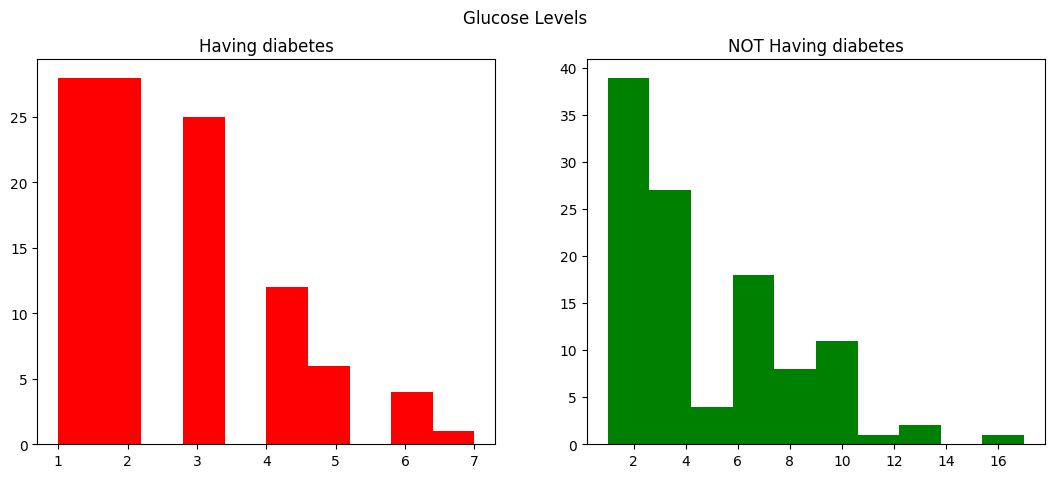

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Outcome']==1]['Glucose'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having diabetes')

data_len=data[data['Outcome']==0]['Glucose'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having diabetes')

fig.suptitle('Glucose Levels')
plt.show()

In [15]:
data["Glucose"].value_counts()#used to count the occurrences of unique values in the "Glucose" column of the DataFrame data

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [16]:
data.isnull().sum() #checking for total null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data[1:5]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Glucose", "BloodPressure", "Age", "Insulin"])
scaled_df.head()

,Glucose,BloodPressure,Age,Insulin
0,0.042708,0.036204,0.048579,0.000000
1,0.024528,0.033187,0.040251,0.000000
2,0.052808,0.032182,0.000000,0.000000
3,0.025683,0.033187,0.031923,0.024208
4,0.039534,0.020113,0.048579,0.043266


In [19]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression

In [20]:
train,test=train_test_split(data,test_size=0.1,random_state=0,stratify=data['Outcome'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['Outcome']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(691, 691, 77, 77)

In [21]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression is 0.8051948051948052
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        50
           1       0.80      0.59      0.68        27

    accuracy                           0.81        77
   macro avg       0.80      0.76      0.77        77
weighted avg       0.80      0.81      0.80        77



In [22]:

model = LinearRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Assuming 'test_Y' contains the true labels for the test set
# Calculate the accuracy
accuracy = accuracy_score(test_Y, prediction.round())

# Print the accuracy
print('The accuracy of Linear Regression is:', accuracy)

The accuracy of Linear Regression is: 0.8311688311688312


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LinearRegression()
model.fit(train_X, train_Y)
#accuracy = accuracy_score(test_Y, predictions.round())
predictions = model.predict(test_X)
mse = mean_squared_error(test_Y, predictions)
rmse = mean_squared_error(test_Y, predictions, squared=False)
mae = mean_absolute_error(test_Y, predictions)
r2 = r2_score(test_Y, predictions)
print('The accuracy of Linear Regression is:', accuracy)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:',r2)

The accuracy of Linear Regression is: 0.8311688311688312
Mean Squared Error: 0.1266516709151842
Root Mean Squared Error: 0.35588154056537435
Mean Absolute Error: 0.2949496341766065
R-squared: 0.44376462455101695
